In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# g마켓 베스트 상품 데이터 수집

In [3]:
# 1. URL
url = 'https://www.gmarket.co.kr/n/best'

In [7]:
# 2. request > response : html
response = requests.get(url)
response, response.text[:50]

(<Response [200]>, '<!DOCTYPE html><html lang="ko" class="no-js"><head')

In [11]:
# 3. html > bs object
dom = BeautifulSoup(response.text, 'html.parser')

In [13]:
# 4. bs object > elements
selector = '#gBestWrap > div.best-list > ul > li'
elements = dom.select(selector)
len(elements)

200

In [10]:
# 5. elements > DataFrame

In [14]:
element = elements[0]
element

<li class="first"><span class="box__corners-id"></span><p class="no1">1</p><div class="thumb"><a aria-hidden="true" href="http://item.gmarket.co.kr/Item?goodscode=3106295509&amp;ver=20230905" tabindex="-1"><img alt="자연산 손질 통 오징어 10미(1.3kg내외)" class="image__lazy" decoding="async" height="210" loading="lazy" src="//gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905" width="210"/></a></div><a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3106295509&amp;ver=20230905">자연산 손질 통 오징어 10미(1.3kg내외)</a><div class="item_price"><div class="o-price"><span class="for-a11y">정가</span><span>35,000<!-- -->원</span></div><div class="s-price"><span class="for-a11y">할인가</span><strong><span>24,500<!-- -->원</span></strong> <span><span class="sale"></span><em>30<!-- -->%</em></span></div><div class="icon"><img alt="무료배송" src="//pics.gmkt.kr/pc/ko/corner/gbest/ic_freeshipping.gif"/></div></div></li>

In [16]:
# 리스트 안에 딕셔너리(row), 딕셔너리 안에 리스트(column)
data = [{'id': 1, 'name': 'A'}, {'id': 2, 'name': 'B'}]
print(data)
df = pd.DataFrame(data)
print(df.to_dict('list'))
df

[{'id': 1, 'name': 'A'}, {'id': 2, 'name': 'B'}]
{'id': [1, 2], 'name': ['A', 'B']}


,id,name
0,1,A
1,2,B


In [17]:
element

<li class="first"><span class="box__corners-id"></span><p class="no1">1</p><div class="thumb"><a aria-hidden="true" href="http://item.gmarket.co.kr/Item?goodscode=3106295509&amp;ver=20230905" tabindex="-1"><img alt="자연산 손질 통 오징어 10미(1.3kg내외)" class="image__lazy" decoding="async" height="210" loading="lazy" src="//gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905" width="210"/></a></div><a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3106295509&amp;ver=20230905">자연산 손질 통 오징어 10미(1.3kg내외)</a><div class="item_price"><div class="o-price"><span class="for-a11y">정가</span><span>35,000<!-- -->원</span></div><div class="s-price"><span class="for-a11y">할인가</span><strong><span>24,500<!-- -->원</span></strong> <span><span class="sale"></span><em>30<!-- -->%</em></span></div><div class="icon"><img alt="무료배송" src="//pics.gmkt.kr/pc/ko/corner/gbest/ic_freeshipping.gif"/></div></div></li>

In [25]:
data = {
    'title': element.select_one('.itemname').text,
    'img': 'http:' + element.select_one('img').get('src'),
    'sprice': element.select_one('.s-price').text,
}
data

{'title': '자연산 손질 통 오징어 10미(1.3kg내외)',
 'img': 'http://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905',
 'sprice': '할인가24,500원 30%'}

In [27]:
items = []
for element in elements:
    items.append({
        'title': element.select_one('.itemname').text,
        'img': 'http:' + element.select_one('img').get('src'),
        'sprice': element.select_one('.s-price').text,
    })
len(items), items[:2]

(200,
 [{'title': '자연산 손질 통 오징어 10미(1.3kg내외)',
   'img': 'http://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905',
   'sprice': '할인가24,500원 30%'},
  {'title': '[언더아머](신세계타임스퀘어점패션관)(best)UA 우븐 그래픽 쇼츠  가벼운 루즈핏 반바지 일상복 트레이닝복 헬스...',
   'img': 'http://gdimg.gmarket.co.kr/2900270518/still/300?ver=20230905',
   'sprice': '할인가25,500원 15%'}])

In [28]:
df = pd.DataFrame(items)
df.tail(2)

,title,img,sprice
198,[맥심]카누 미니 마일드 아메리카노 130T : 당일발송~,http://gdimg.gmarket.co.kr/2386544901/still/30...,"할인가23,900원"
199,[오리온]고래송이 미니믹스 20P 560g (고래밥 10P+초코송이 10P),http://gdimg.gmarket.co.kr/1907380427/still/30...,"할인가9,500원"


In [29]:
# 6. 상품 이미지 데이터 수집

In [34]:
# 디렉토리 생성
import os
path = 'imgs'
os.makedirs(path)

In [44]:
# %ls imgs

In [39]:
# img-url
link = df.loc[0, 'img']
link

'http://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905'

In [40]:
# request(img-url) > response : img
response = requests.get(link)
response

<Response [200]>

In [42]:
# img > save
with open(f'{path}/test.jpg', 'wb') as file:
    file.write(response.content)

In [43]:
%ls imgs

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F618-ECDB

 C:\Users\User\Desktop\web_crawling\imgs 디렉터리

2023-09-05  오후 04:02    <DIR>          .
2023-09-05  오후 04:02    <DIR>          ..
2023-09-05  오후 04:02            51,700 test.jpg
               1개 파일              51,700 바이트
               2개 디렉터리  351,668,146,176 바이트 남음


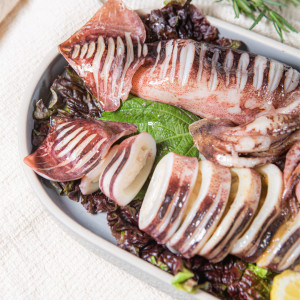

In [46]:
from PIL import Image as pil
pil.open(f'{path}/test.jpg')

In [51]:
for idx, data in df[:5].iterrows():
    print(idx, data['img'])
    link = data['img']
    response = requests.get(link)
    with open(f'{path}/{idx}.jpg', 'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/3106295509/still/300?ver=20230905
1 http://gdimg.gmarket.co.kr/2900270518/still/300?ver=20230905
2 http://gdimg.gmarket.co.kr/2989880552/still/300?ver=20230905
3 http://gdimg.gmarket.co.kr/2428887801/still/300?ver=20230905
4 http://gdimg.gmarket.co.kr/2845754398/still/300?ver=20230905


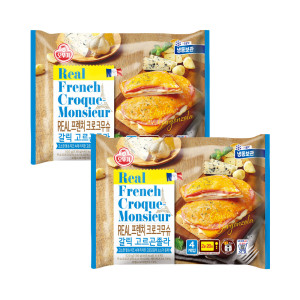

In [53]:
from PIL import Image as pil
pil.open(f'{path}/3.jpg')

In [52]:
%ls imgs

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: F618-ECDB

 C:\Users\User\Desktop\web_crawling\imgs 디렉터리

2023-09-05  오후 04:09    <DIR>          .
2023-09-05  오후 04:09    <DIR>          ..
2023-09-05  오후 04:09            51,700 0.jpg
2023-09-05  오후 04:09             8,456 1.jpg
2023-09-05  오후 04:09            16,720 2.jpg
2023-09-05  오후 04:09            40,051 3.jpg
2023-09-05  오후 04:09            20,805 4.jpg
2023-09-05  오후 04:02            51,700 test.jpg
               6개 파일             189,432 바이트
               2개 디렉터리  351,674,204,160 바이트 남음
